## This notebook showcases some examples of processed AIA data using the built tools.

Be sure that the `aia_lightcurves` package is either seen by the `PYTHONPATH` system variable or in the local directory containing this notebook.

In [1]:
from aia_lightcurves.Observation import Observation, regions, u

---

## 2022-06-03

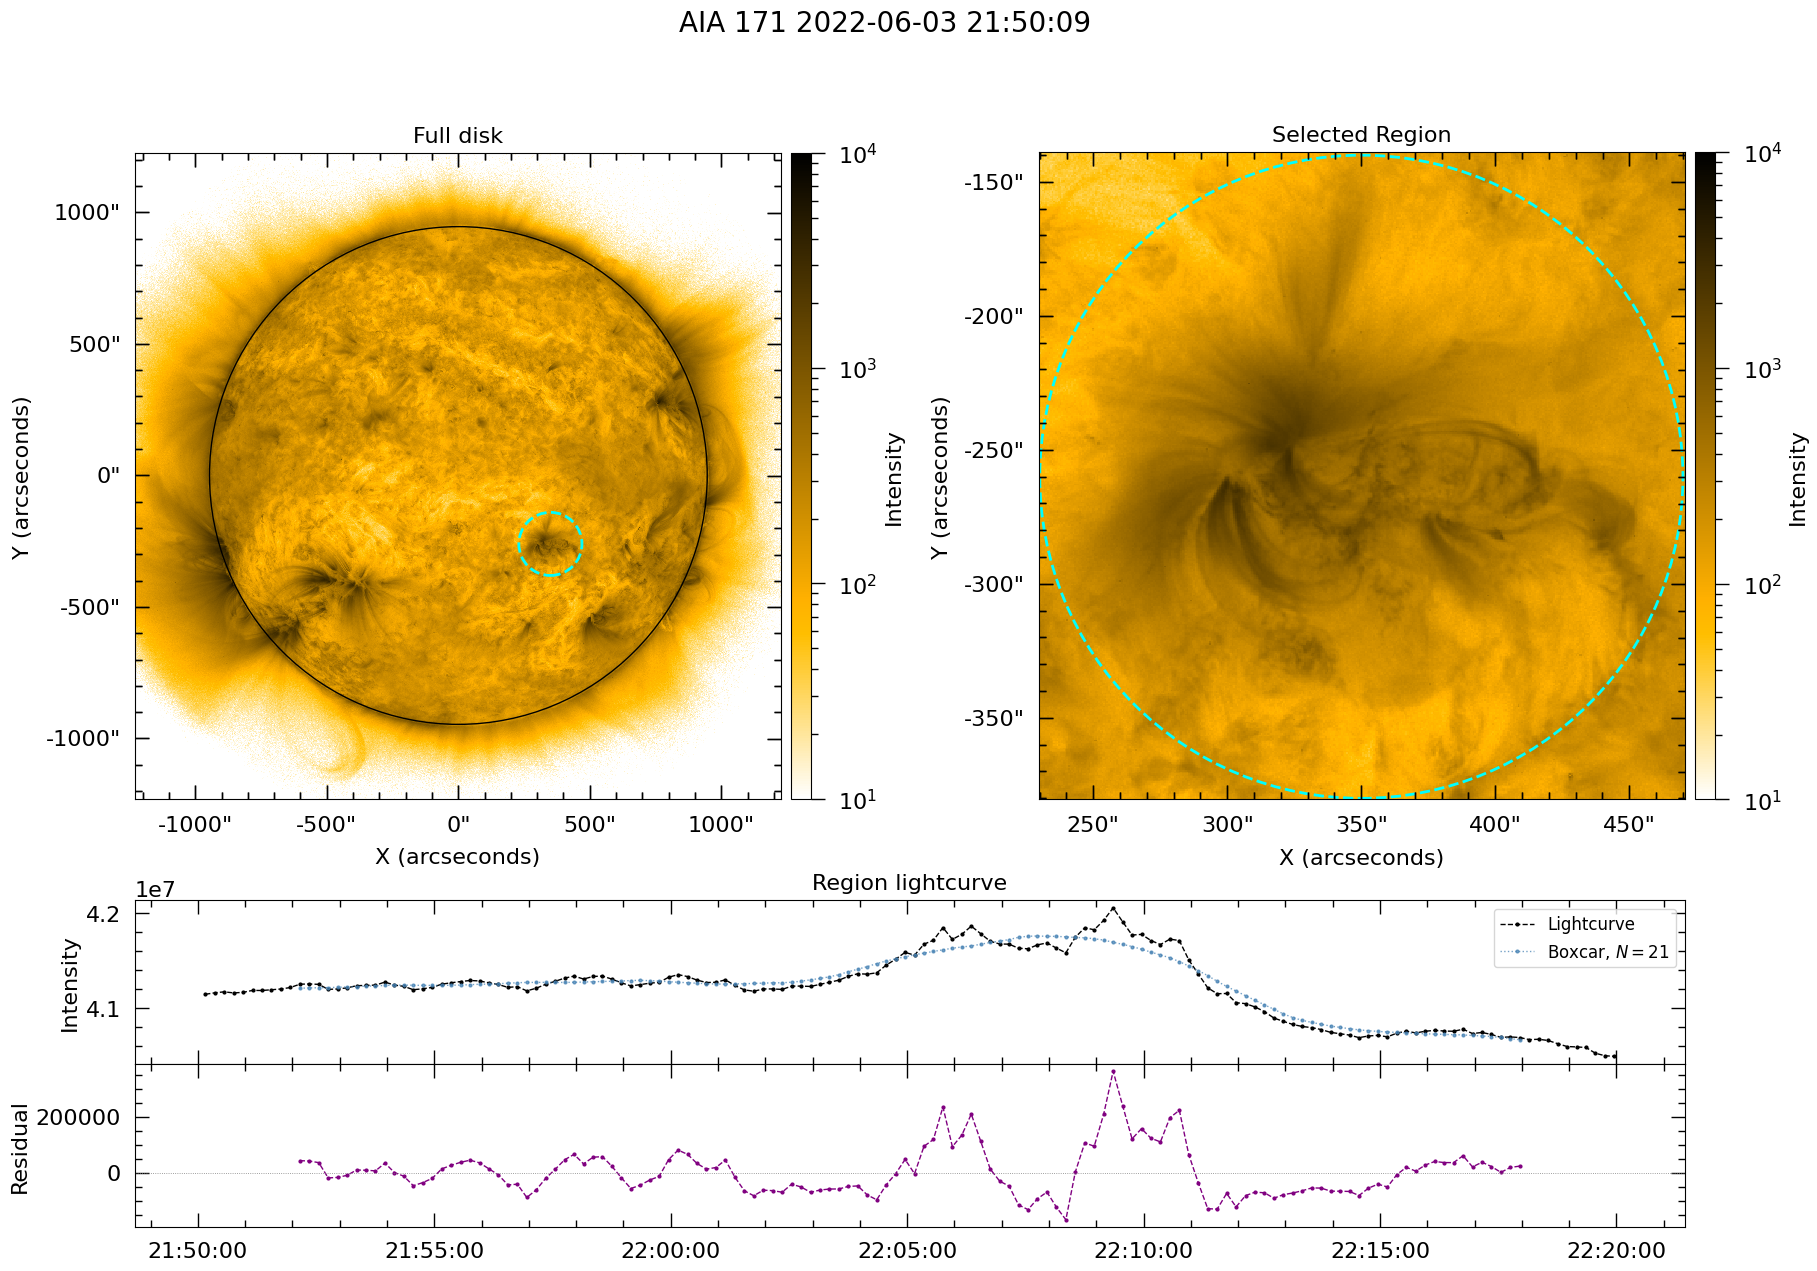

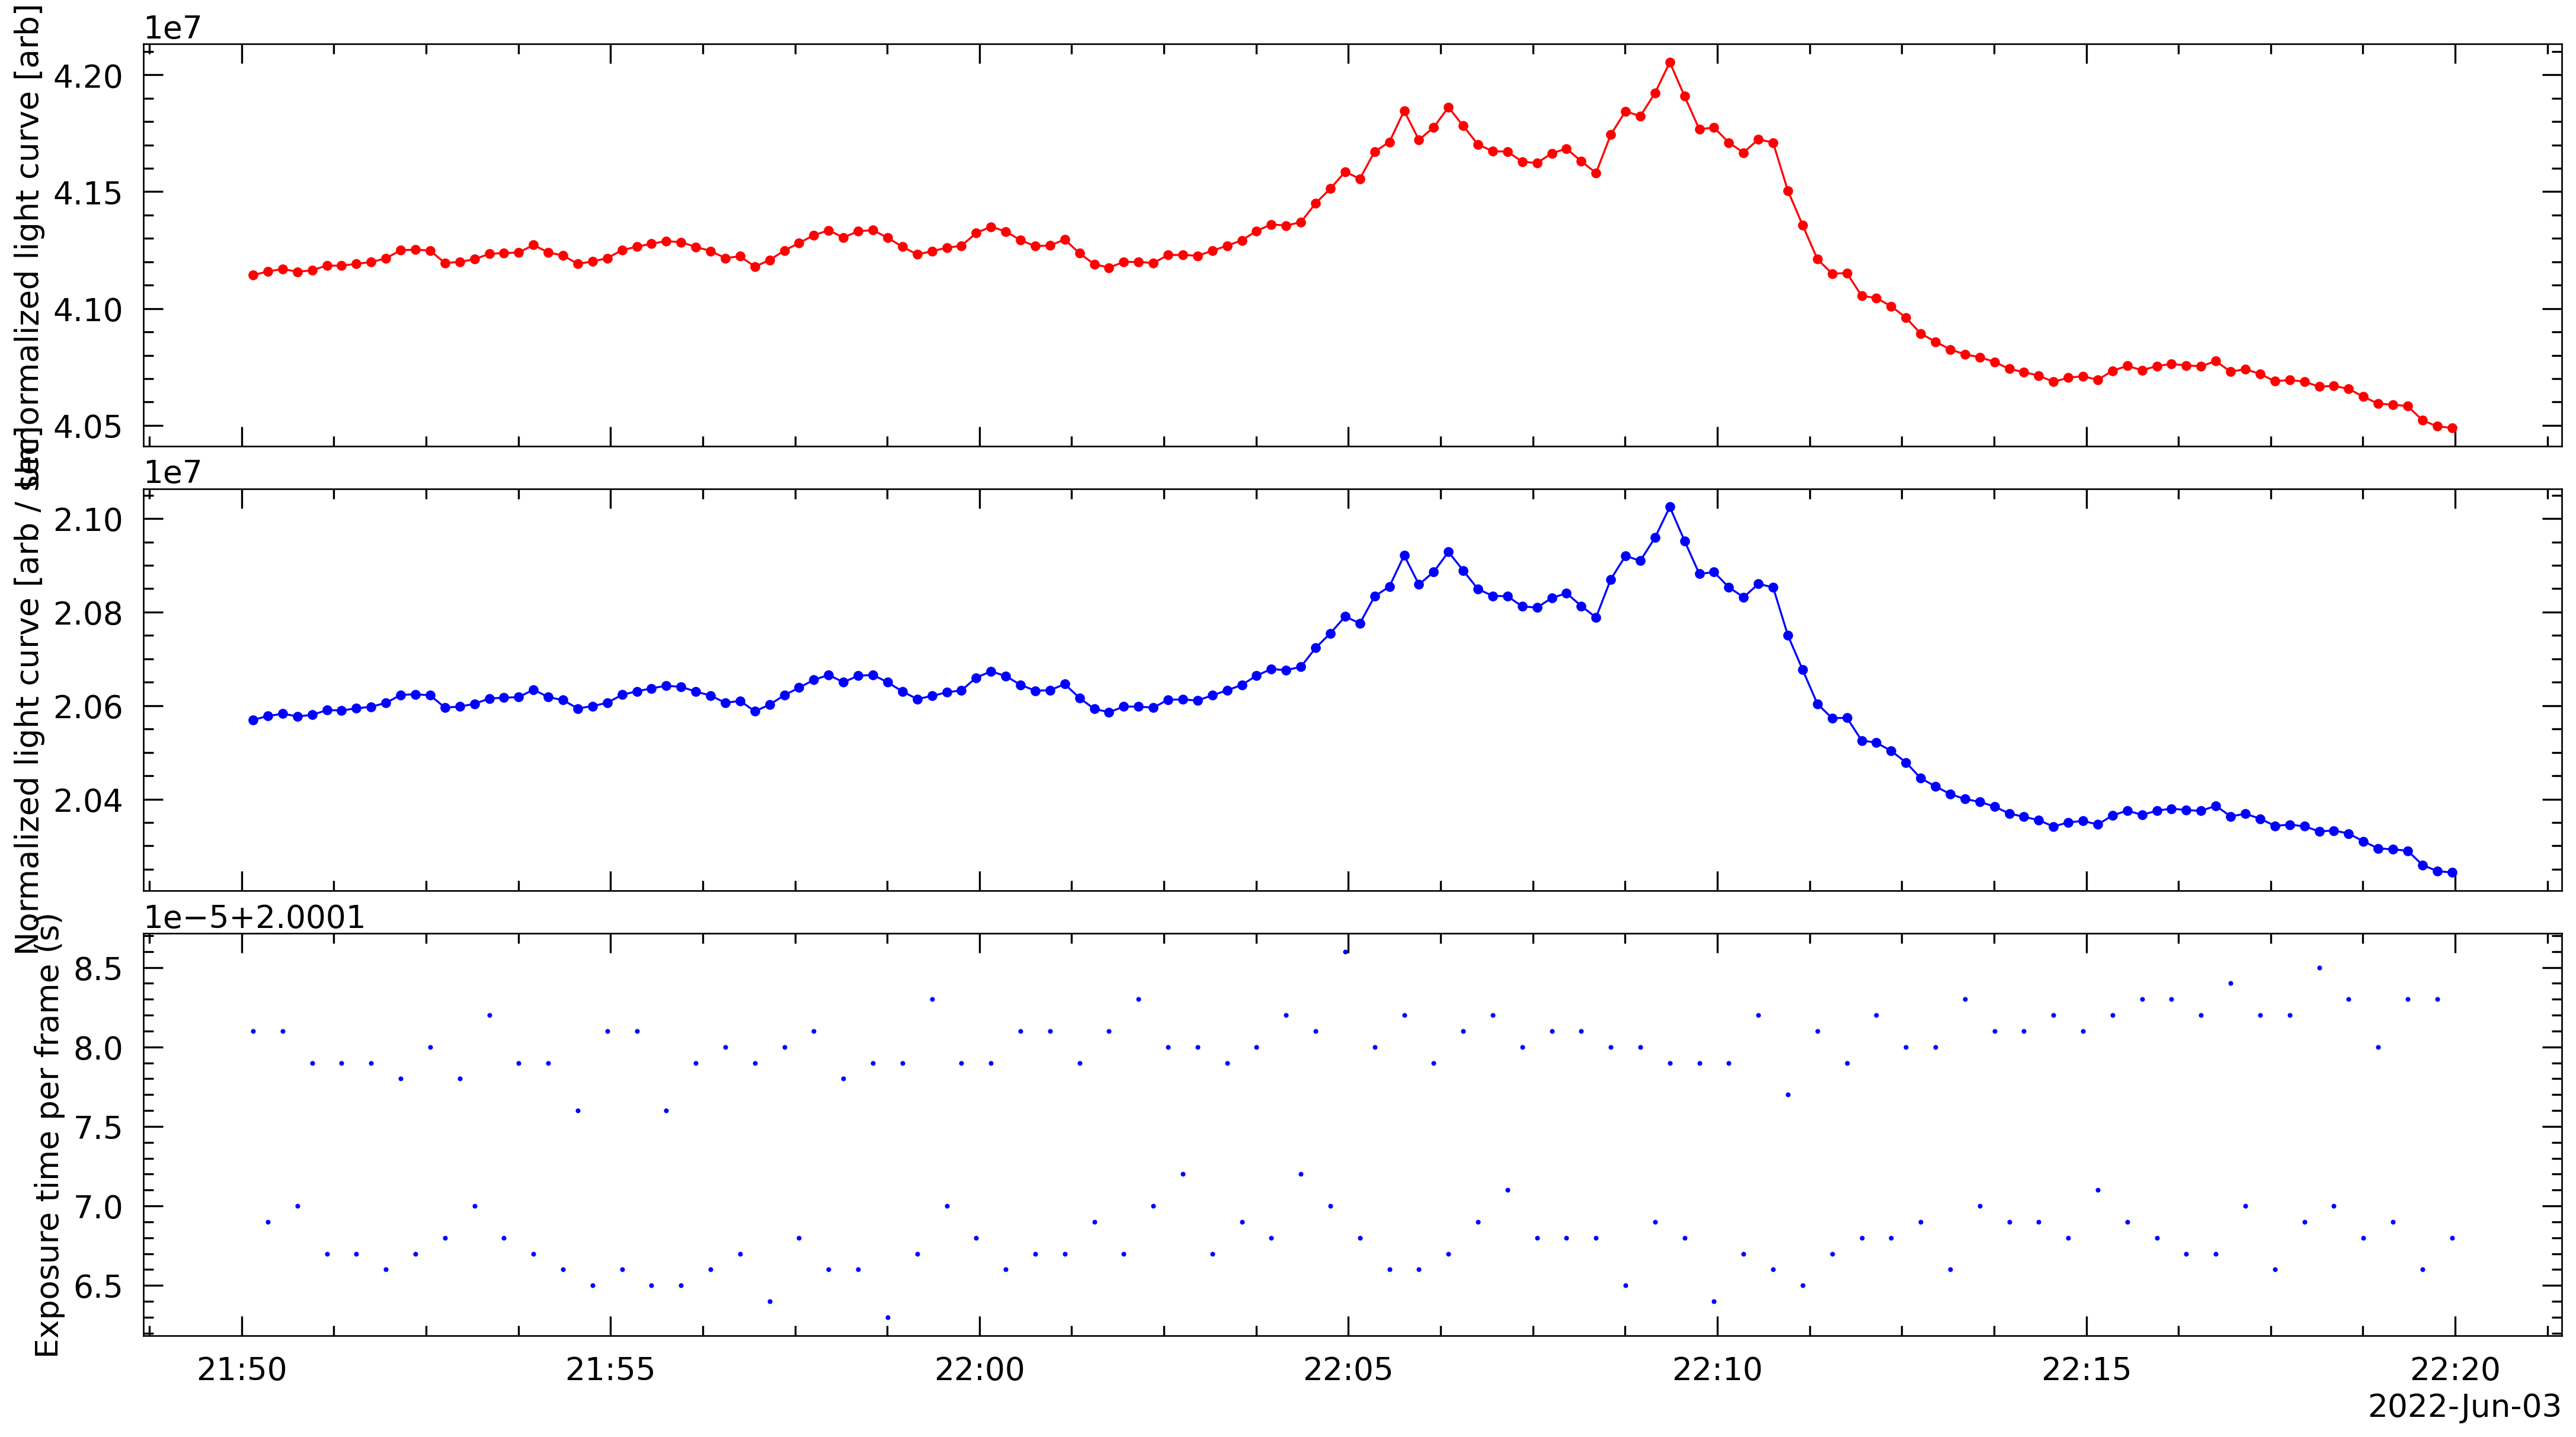

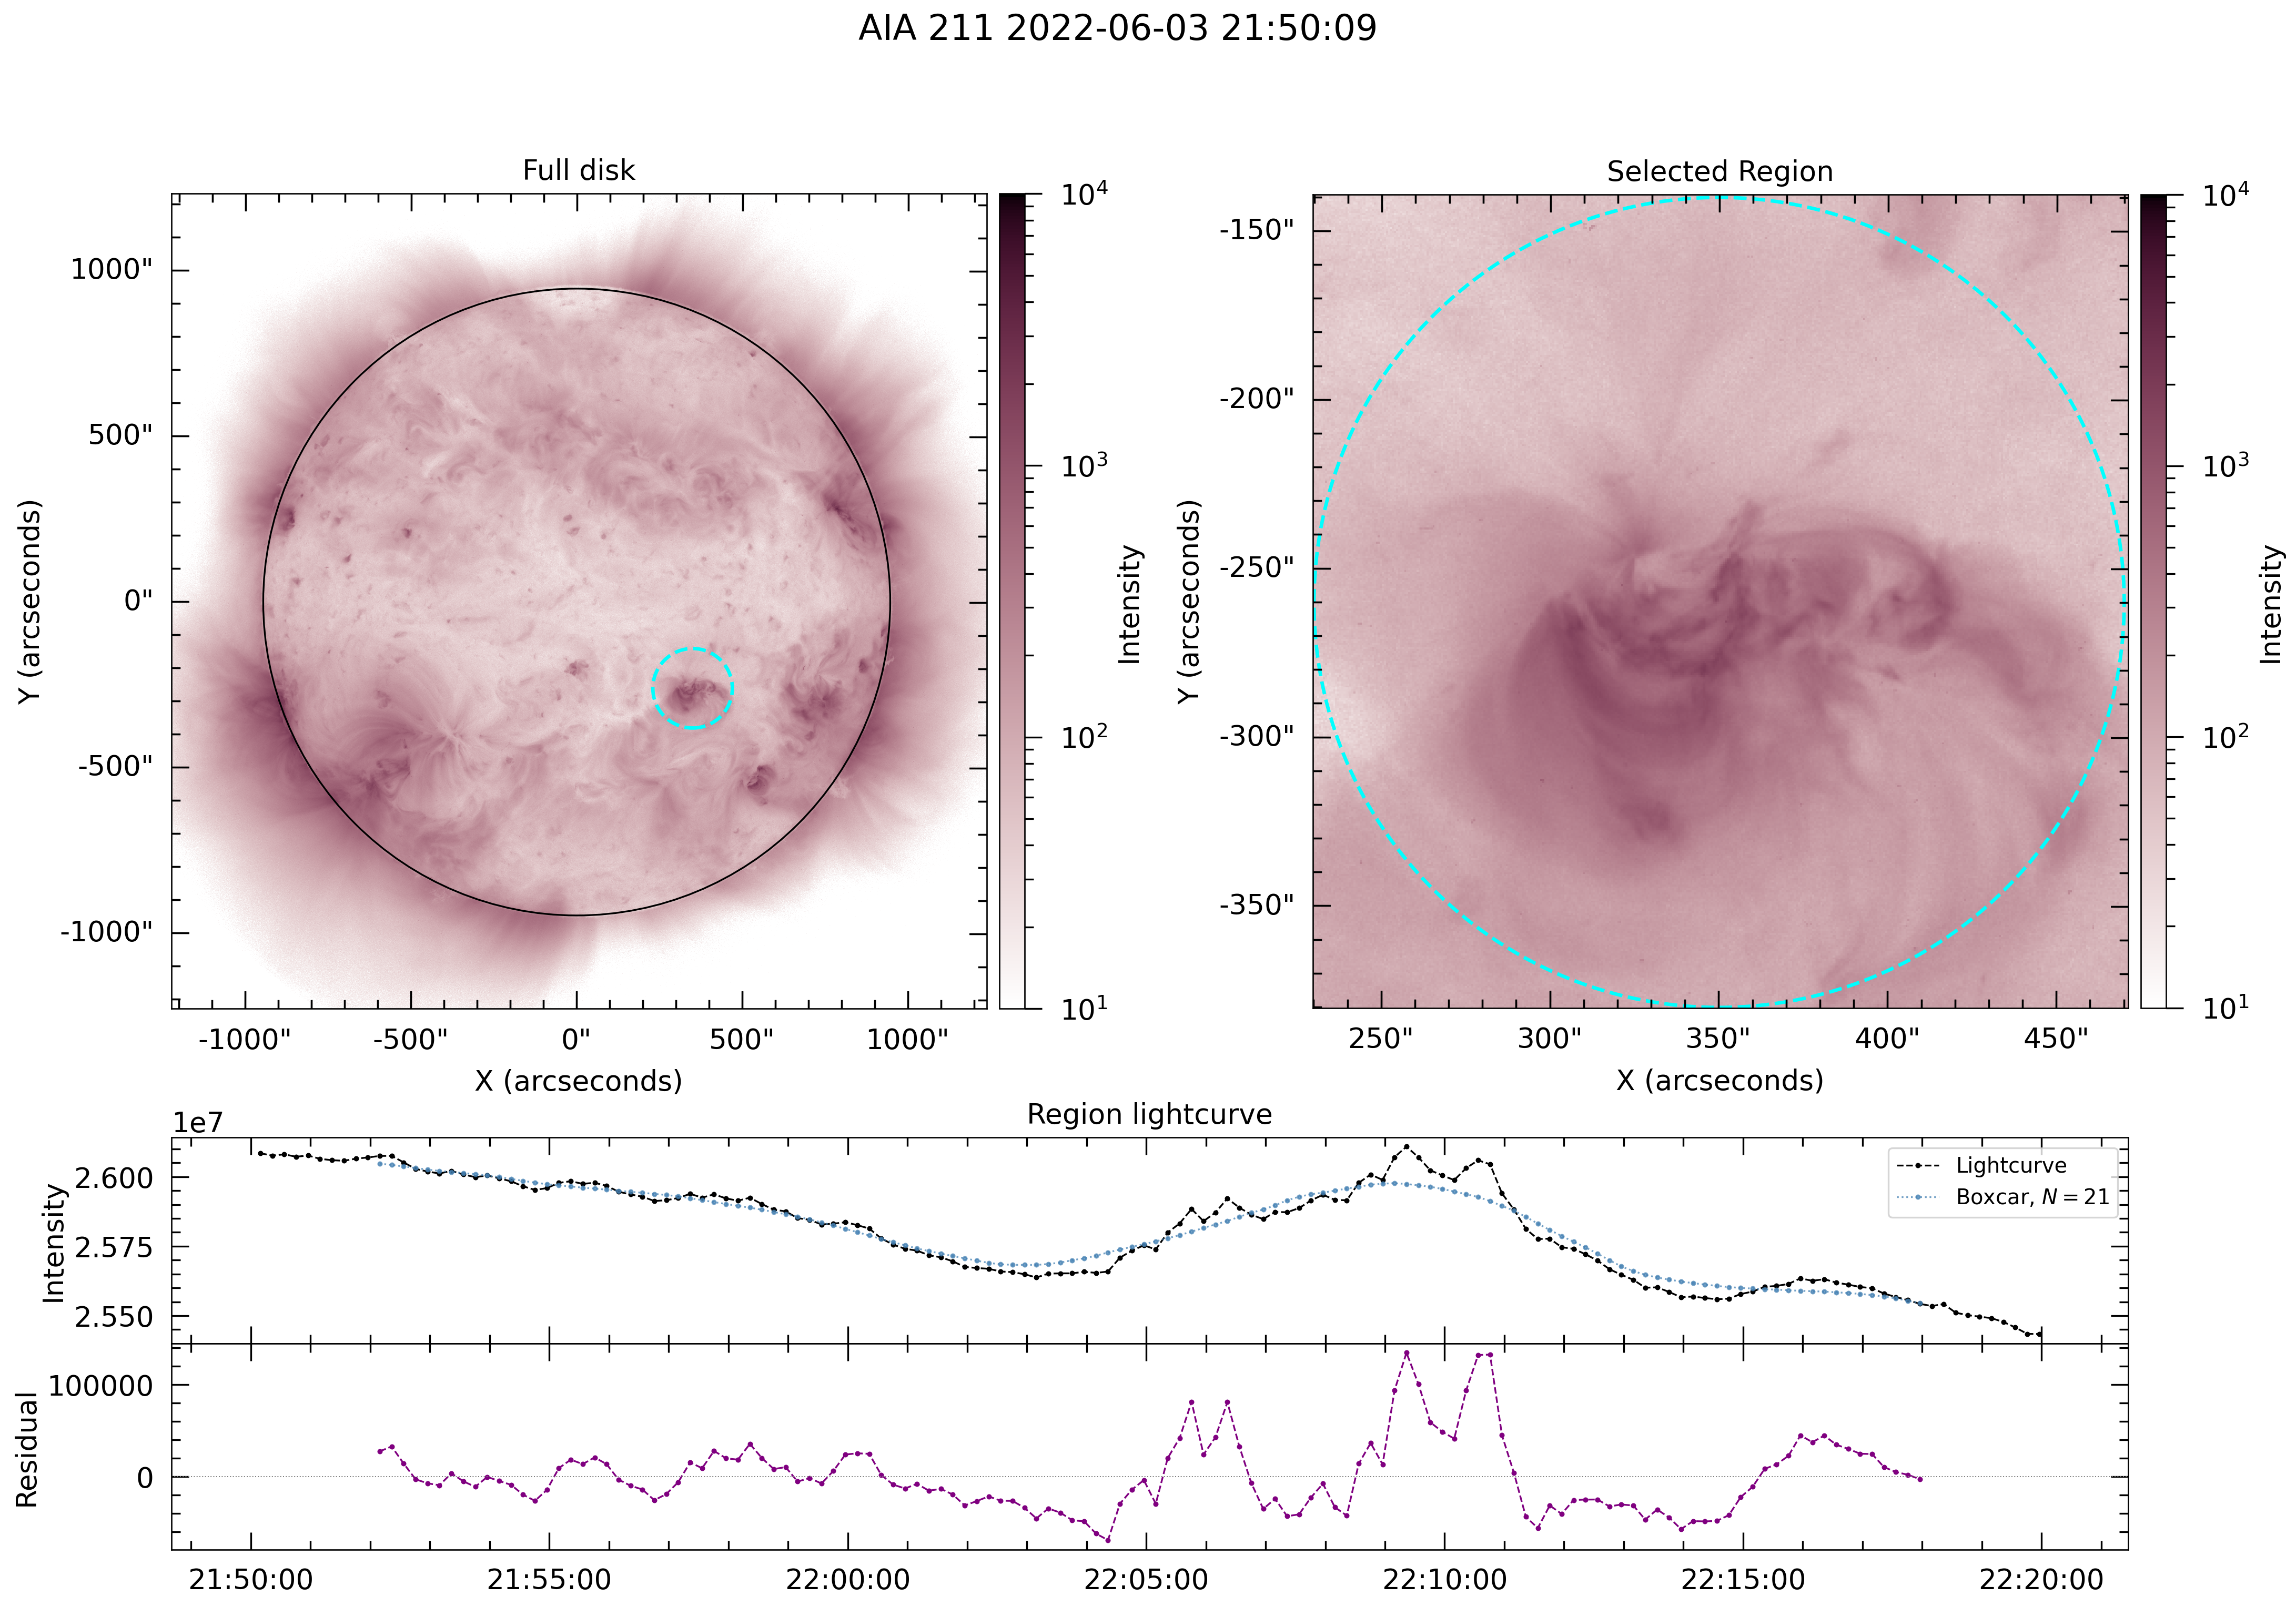

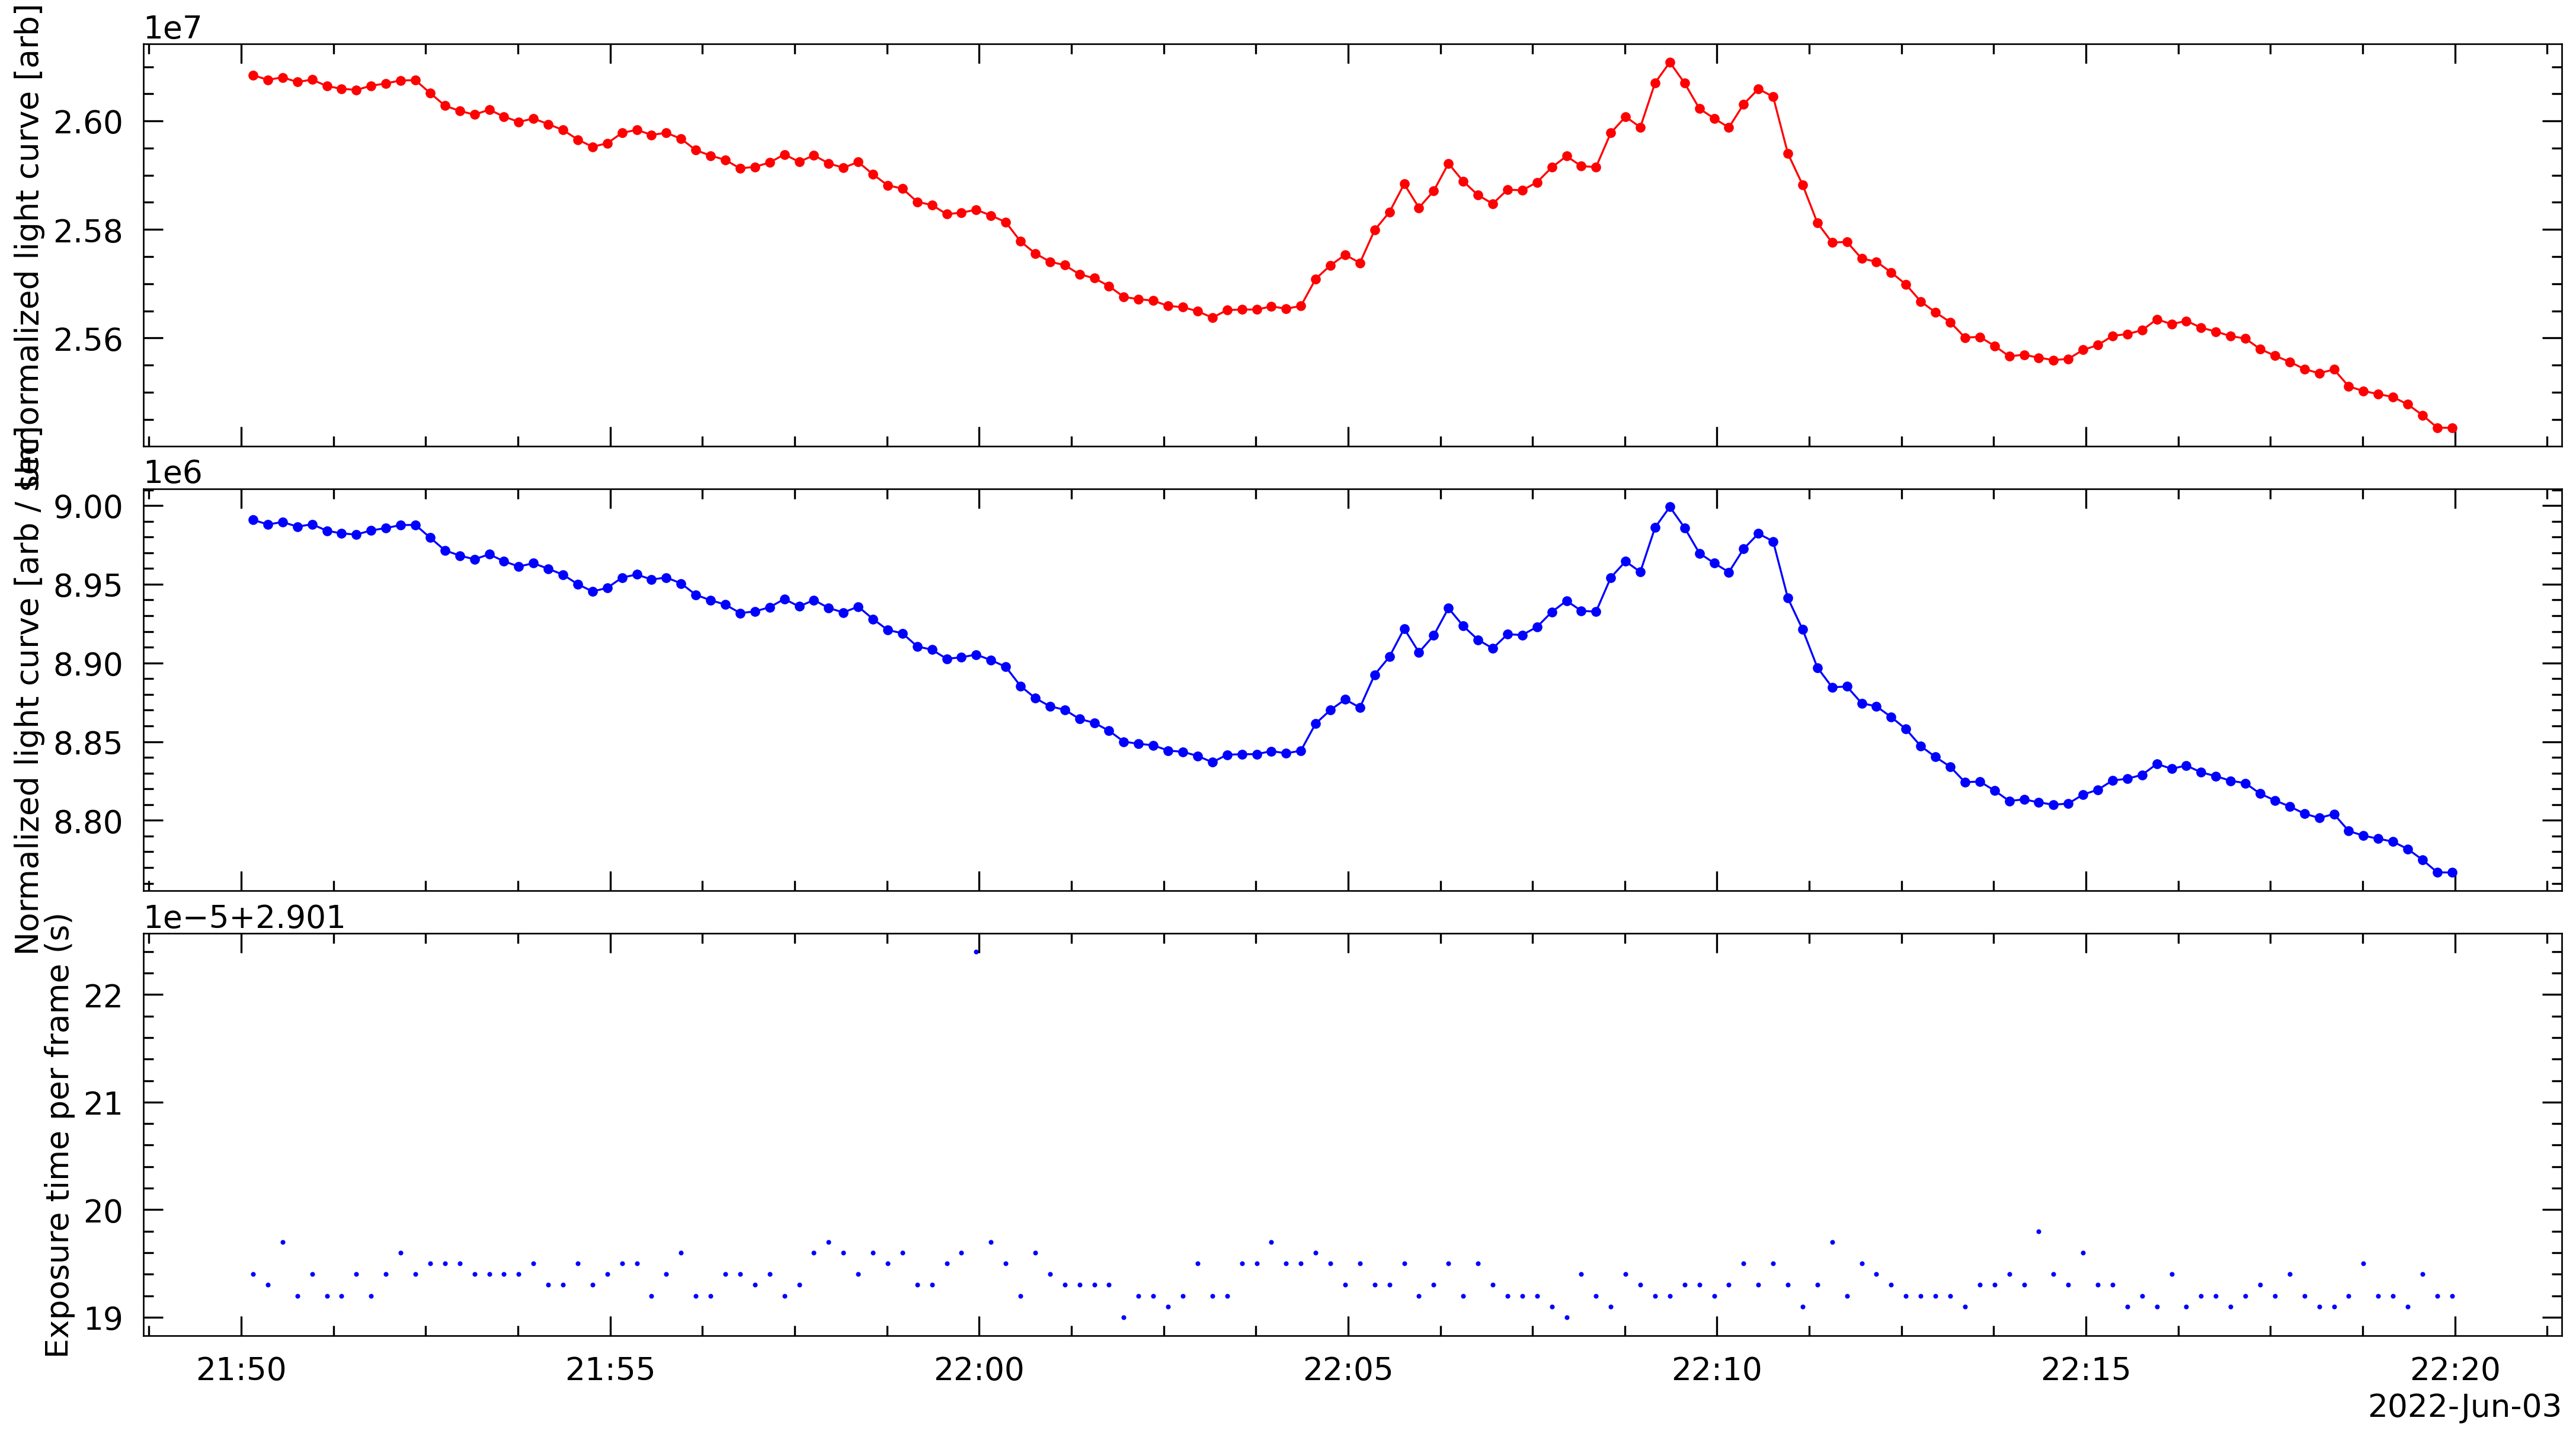

In [2]:
obs = Observation(
    '2022-06-03 21:50:00.0',
    '2022-06-03 22:20:00.0',
    (171, 211) * u.Angstrom,
    boxcar_width = 21
)

obs.set_region(
    regions.CircleSkyRegion,
    center = (350, -260) * u.arcsec,
    radius = 120 * u.arcsec,
    name = 'region1'
)
obs.process()

---

## Different regions

You can input any SkyRegion that is included in the `regions` package. Above, we used a CircleSkyRegion, and here are some examples of how to use a RectangleSkyRegion and a CircleAnnulusSkyRegion. See [this page](https://astropy-regions.readthedocs.io/en/stable/shapes.html) for a list of available regions.

In [ ]:
obs.set_region(
    regions.RectangleSkyRegion,
    center = (350, -260) * u.arcsec,
    width  = 200 * u.arcsec,
    height = 500 * u.arcsec,
    angle  = 60 * u.deg
)

obs.set_region(
    regions.CircleAnnulusSkyRegion,
    center = (350, -260) * u.arcsec,
    inner_radius = 100 * u.arcsec,
    outer_radius = 300 * u.arcsec
)

---

## Parallel downloads example + timing (with debug printing)
### see `parallel_example_log_saved` for something to expect

In [ ]:
import astropy.units as u
import astropy.time
from aia_lightcurves import file_io
import datetime
import sys

logfile = 'parallel_example.log'

orig_stdout = sys.stdout

print('logging example output to', logfile)
print(f'you can view it with `tail -f {logfile}`')
with open (logfile, 'w') as f:
    sys.stdout = f
    start = astropy.time.Time('2019-04-03T17:40:00.0')
    end = astropy.time.Time('2019-04-03T17:55:00.0')
    wav = 171 << u.Angstrom
    dbg = True

    run_start = datetime.datetime.now()
    downloaded = file_io.download_fits_parallel(
        start_time=start,
        end_time=end,
        wavelengths=[wav],
        print_debug_messages=dbg
    )
    run_end = datetime.datetime.now()
    print(f'this took {run_end - run_start}')

    print()
    if all(d.success for d in downloaded):
        print('all downloads successful')
    else:
        print('failed:')
        for d in downloaded:
            if not d.success: print(d)

sys.stdout = orig_stdout

---